## One dimensional diffraction

Fresnel diffraction in 1D. My expression for Fresnel diffraction comes from the 2D result with rho coordinates set equal to x, so I expect that the result here is the equivalent of a 2D case in which the field has infinite extent in y. Even though I show x-z plots from the source plane to the far field, the near-field, i.e. when z not >> zFresnel, is not trustworthy.

In [70]:
## general imports
from numpy import *
from numpy.fft import fft,fft2,fftshift,ifftshift
import matplotlib.pyplot as plt
from matplotlib import colors
from time import time
import random as rand

# ## local imports
# from field_funcs import * # my helper functions

## make the display wide
from IPython.core.display import HTML, display, Image
display(HTML("<style>.container{width:100% !important;}</style>"))

## test with single slit

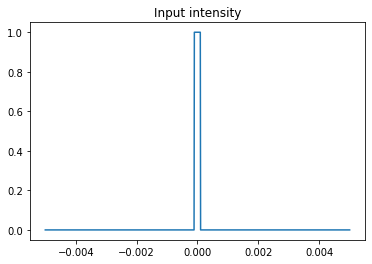

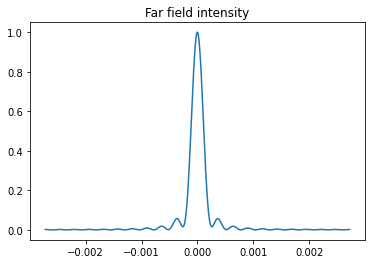

In [71]:
lmbda = 5.32e-7
k = 2*pi/lmbda
d=1e-1 # the propagation distance

# define the input field 
w = 1e-2 # grid width
pts = 1024
res = w/pts # real space length per pixel
x0pts = linspace(-w/2,w/2,pts)

# input field
field0 = zeros(pts)
slitw = 1e-4 # slit width
field0[int(pts/2 - slitw/res):int(pts//2 + slitw/res)] = 1 # non-zero field in the slit

plt.title("Input intensity")
plt.plot(x0pts,abs(field0)**2)
plt.show()

# the field in the output plane
x1pts = array([i*1/(x0pts[1]-x0pts[0])*lmbda*d/pts for i in linspace(-pts/2, pts/2, pts)])
field1 = (1j*k/d)*exp(1j*k*x0pts**2/(2*d))*fftshift(fft(ifftshift(field0*exp(1j*k*x0pts**2/(2*d)))))

plt.title("Far field intensity")
plt.plot(x1pts,abs(field1)**2/max(abs(field1)**2))
plt.show()

## diffraction plot in x-z

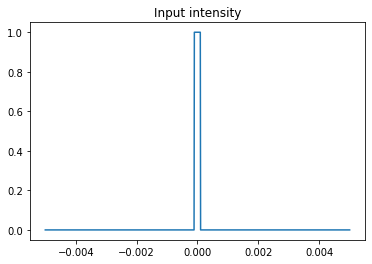

done


In [62]:
lmbda = 5.32e-7
k = 2*pi/lmbda
d = 0.1 # the propagation distance

# define the input field 
w = 1e-2 # grid width
pts = 1024
res = w/pts # real space length per pixel
x0pts = linspace(-w/2,w/2,pts)

# input field
field0 = zeros(pts)
slitw = 1e-4 # slit width
field0[int(pts/2 - slitw/res):int(pts//2 + slitw/res)] = 1 # non-zero field in the slit

plt.title("Input intensity")
plt.plot(x0pts,abs(field0)**2)
plt.show()

# the field in at each transverse plane in z

slices = 100
zsteps = linspace(d/slices,d,slices)
int_xz = empty((pts,slices+1),float) # the intensity in the xz plane
int_xz[:,0] = abs(field0)**2/max(abs(field0)**2)
for i,z in enumerate(zsteps):
    
    # transform to plane z
    x1pts = array([i*1/(x0pts[1]-x0pts[0])*lmbda*z/pts for i in linspace(-pts/2, pts/2, pts)])
    field1 = (1j*k/z)*exp(1j*k*x0pts**2/(2*z))*fftshift(fft(ifftshift(field0*exp(1j*k*x0pts**2/(2*z)))))
    
     # technically, the real space width of the field is decreased at each z plane
    # that we transform to, so we need to resample the field at each plane to 
    # maintain the same real space width. resample below
    int_xz[:,i+1] = abs(field1)**2/max(abs(field1)**2)
    int_xz_interp = lambda x0 : interp(x0, x1pts, int_xz[:,i+1]) if abs(x0) < max(x1pts) else 0
    int_xz[:,i+1] = array([int_xz_interp(x0) for x0 in x0pts])

print("done")

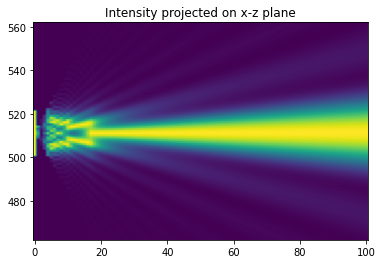

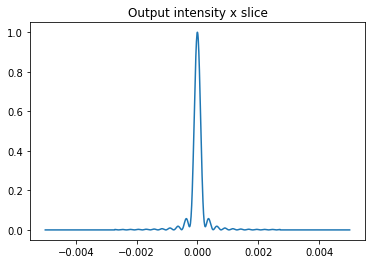

In [79]:
plt.title("Intensity projected on x-z plane")
plt.imshow(int_xz,aspect='auto')
roi = array([pts//2-50,pts//2+50])
plt.ylim(roi)
plt.show()

plt.title("Output intensity x slice")
plt.plot(x0pts,int_xz[:,slices])
plt.show()

## multiple apertures
really this ought to be solved numerically from plane to plane... I'm could cheat and put each aperture in the far field of the previous aperture